In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from videpy import Vide

import stan
import nest_asyncio

plt.style.use('default')

plt.rcParams['axes.facecolor'] = 'lightgray'

In [2]:
# To running the stan in jupyter notebook
nest_asyncio.apply()

### RCode 6.1 - Pag 162

In [3]:
np.random.seed(1914)

N = 200
p = 0.1

# Não correlacionado noticiabilidade(newsworthiness) e confiabilidade(trustworthiness)
nw = np.random.normal(0, 1, N)
tw = np.random.normal(0, 1, N)

# Selecionando os 10% melhores
s = nw + tw  # Score total
q = np.quantile(s, 1-p)  # Top 10% 
selected = [ True if s_i >= q else False for s_i in s ]
print('Noticiabilidade(newsworthiness): \n', nw[selected], '\n\n')
print('Confiabilidade(trustworthiness):\n', tw[selected], '\n\n')

print('Correlação: ', np.correlate(tw[selected], nw[selected]))

Noticiabilidade(newsworthiness): 
 [ 0.82456357  1.85614543  0.85556981  1.4066898   1.6026727   1.42256068
  0.71166144  1.30222516  0.56454812  3.02039213  0.93879118  1.04202561
 -0.4640972   0.12272254  1.99579665  1.59807671  1.82853378  1.15394068
  1.48966066  1.22640255] 


Confiabilidade(trustworthiness):
 [ 1.24510334  1.29709756  2.10293057  0.66088341  1.76728533  0.64448519
  1.17598088  0.35356094  1.08805257 -0.72327249  1.31462133  1.54253157
  2.8128998   1.51862223  1.18048237  2.31948695 -0.09763283  0.87205345
  0.74979249  0.46329186] 


Correlação:  [19.93737242]


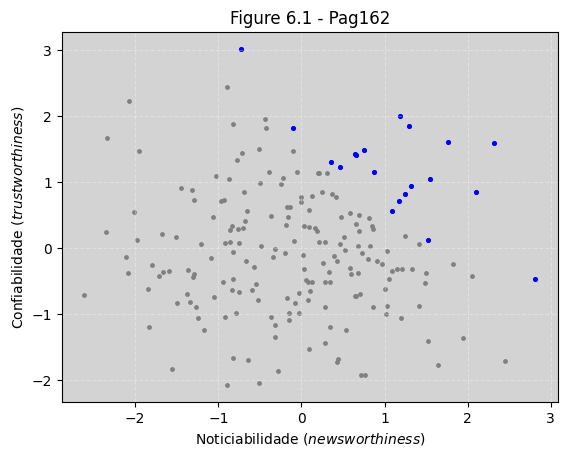

In [4]:
plt.scatter(tw, nw, s=6, color='gray')
plt.scatter(tw[selected], nw[selected], s=7, color='blue')

plt.title('Figure 6.1 - Pag162')
plt.xlabel('Noticiabilidade ($newsworthiness$)')
plt.ylabel('Confiabilidade ($trustworthiness$)')

plt.grid(ls='--', color='white', alpha=0.3)

### RCode 6.2 - pag163


In [5]:
N = 100

np.random.seed(909)  # Teste com outras sementes

height = np.random.normal(10, 2,  N)

leg_proportion = np.random.uniform(0.4, 0.5, N)

leg_left  = np.random.left = leg_proportion * height + np.random.normal(0, 0.02, N)
leg_right = np.random.left = leg_proportion * height + np.random.normal(0, 0.02, N)


df = pd.DataFrame({'height': height, 
                   'leg_left': leg_left, 
                   'leg_right': leg_right})
df.head()

,height,leg_left,leg_right
0,8.463728,4.094675,4.078446
1,9.854070,4.776475,4.687749
2,8.668694,4.192607,4.256472
3,7.523768,3.088674,3.088206
4,9.381352,4.093217,4.048181


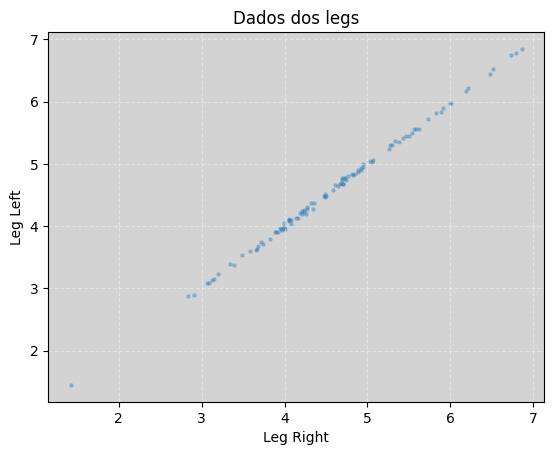

In [6]:
plt.scatter(leg_right, leg_left, s=5, alpha=0.3)

plt.title('Dados dos legs')
plt.xlabel('Leg Right')
plt.ylabel('Leg Left')

plt.grid(ls='--', color='white', alpha=0.4)

plt.show()

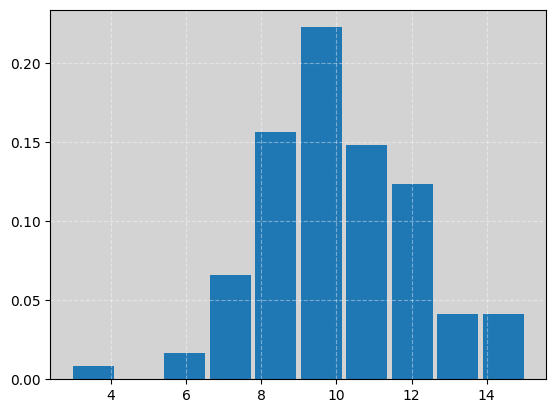

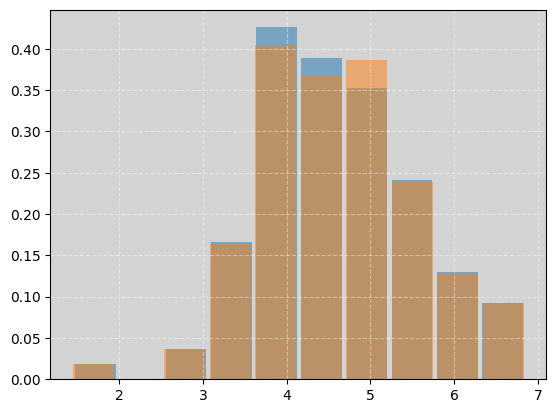

In [7]:
plt.hist(df.height, rwidth=0.9, density=True)
plt.grid(ls='--', color='white', alpha=0.4)
plt.show()

plt.hist(df.leg_left, rwidth=0.9, density=True, alpha=0.5)
plt.hist(df.leg_right, rwidth=0.9, density=True, alpha=0.5)

plt.grid(ls='--', color='white', alpha=0.4)
plt.show()

In [8]:
model = """
    data {
        int<lower=0> N;
        vector[N] height;
        vector[N] leg_left;
        vector[N] leg_right;
    }
    
    parameters {
        real alpha;
        real beta_left;
        real beta_right;
        real<lower=0> sigma; 
    }
    
    model {
        alpha ~ normal(10, 100);
        beta_left ~ normal(2, 10);
        beta_right ~ normal(2, 10);
        sigma ~ exponential(1);
        
        height ~ normal(alpha + beta_left * leg_left + beta_right * leg_right, sigma);
    }
"""

data = {
    'N': N,
    'height': height,
    'leg_left': leg_left,
    'leg_right': leg_right
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

alpha = samples['alpha'].flatten()
beta_left = samples['beta_left'].flatten()
beta_right = samples['beta_right'].flatten()
sigma = samples['sigma'].flatten()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_ck8txll7/model_gsymk2uq.stan', line 17, column 27: Argument 100 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   1% (100/8000)
Sampling:   2% (200/8000)
Sampling:   4% (300/8000)
Sampling:   5% (400/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  19% (1500/8000)
Sampling:  21% (1700/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  52% (4200/8000)
Sampling:  70% (5600/8000)
Sampling:  84% (6700/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/800

### RCode 6.4 - pag164

In [9]:
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,0.95,0.33,0.36,1.57
beta_left,-1.53,2.13,-5.48,2.24
beta_right,3.53,2.11,-0.12,7.55
sigma,0.66,0.05,0.58,0.75


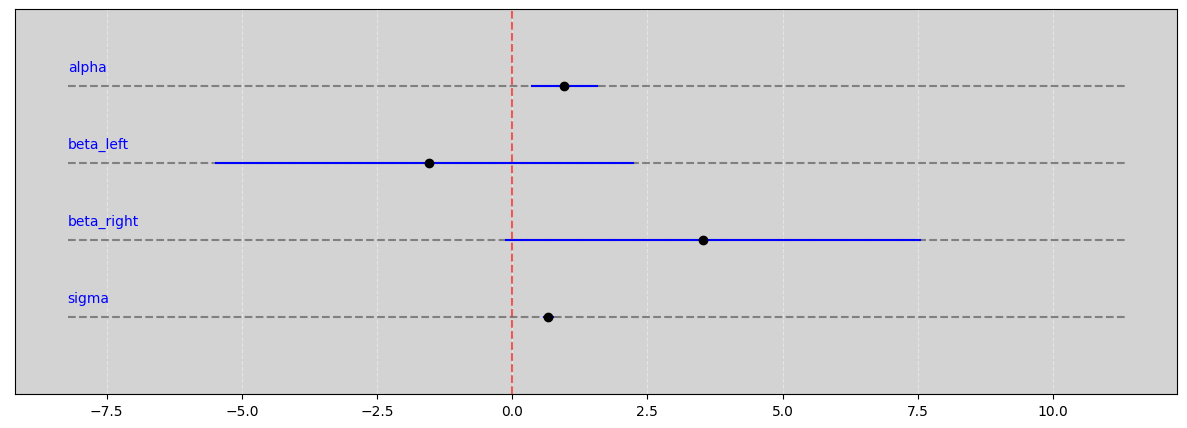

In [10]:
Vide.plot_forest(samples)

### RCode 6.5 - pag164

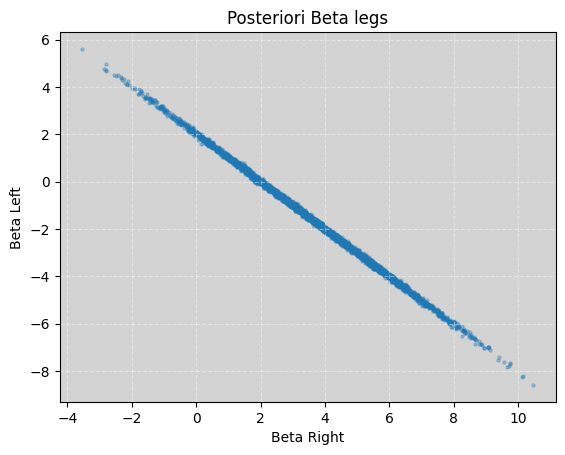

In [11]:
plt.scatter(beta_right, beta_left, s=5, alpha=0.3)

plt.title('Posteriori Beta legs')
plt.xlabel('Beta Right')
plt.ylabel('Beta Left')

plt.grid(ls='--', color='white', alpha=0.4)

plt.show()

### RCode 6.6 - pag 165

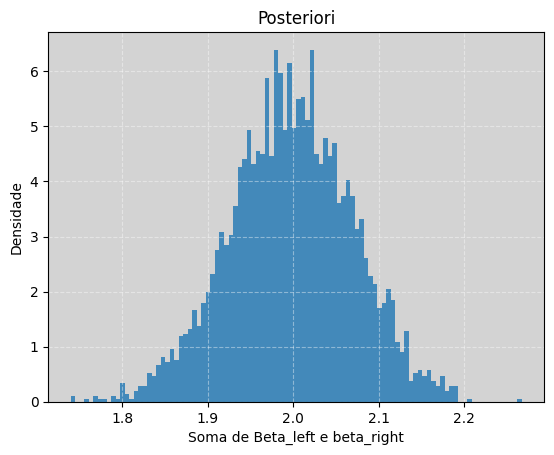

In [12]:
plt.hist((beta_left + beta_right), density=True, alpha=0.8, bins=100)

plt.title('Posteriori')
plt.xlabel('Soma de Beta_left e beta_right')
plt.ylabel('Densidade')

plt.grid(ls='--', color='white', alpha=0.4)

plt.show()

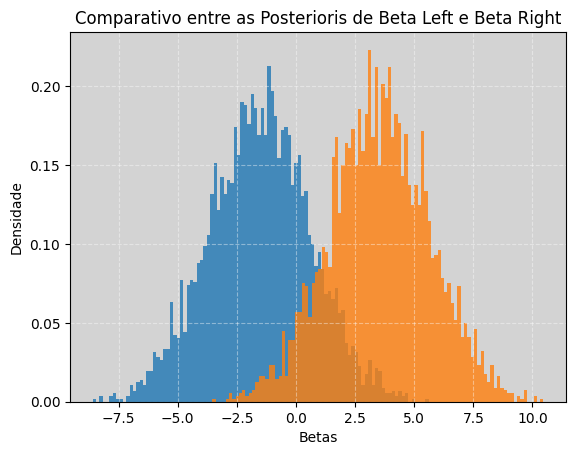

In [13]:
# Comparação com os beta indivíduais

plt.hist(beta_left, density=True, alpha=0.8, bins=100)  # Beta left

plt.hist(beta_right, density=True, alpha=0.8, bins=100)  # Beta Right

plt.title('Comparativo entre as Posterioris de Beta Left e Beta Right')
plt.xlabel('Betas')
plt.ylabel('Densidade')

plt.grid(ls='--', color='white', alpha=0.4)

plt.show()

### RCode 6.7 - Pag 166

In [14]:
model = """
    data {
        int N;
        vector[N] leg_left;
        vector[N] height;
    }
    
    parameters {
        real alpha;
        real beta_left;
        real sigma;
    }
    
    model {
        alpha ~ normal(10, 100);
        beta_left ~ normal(2, 10);
        sigma ~ exponential(1);
        
        height ~ normal(alpha + beta_left * leg_left, sigma);
    }
"""

data = {
    'N': len(height),
    'leg_left': leg_left,
    'height': height,
}

posteriori = stan.build(model, data=data)
samples = posteriori.sample(num_chains=4, num_samples=1000)

alpha = samples['alpha'].flatten()
beta_left = samples['beta_left'].flatten()
sigma = samples['sigma'].flatten()

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_gahyqwl3/model_he7o66lc.stan', line 19, column 54: A normal distribution is given parameter sigma as a scale parameter (argument 2), but sigma was not constrained to be strictly positive.
Warning in '/tmp/httpstan_gahyqwl3/model_he7o66lc.stan', line 17, column 8: Parameter sigma is given a exponential distribution, which has strictly positive support, but sigma was not constrained to be strictly positive.
Warning in '/tmp/httpstan_gahyqwl3/model_he7o66lc.stan', line 15, column 27: Argument 100 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would 

In [15]:
# RCode 6.7 - Continuação
Vide.summary(samples)

,mean,std,7.0%,93.0%
alpha,0.82,0.33,0.20,1.38
beta_left,2.03,0.07,1.90,2.15
sigma,0.67,0.05,0.58,0.76


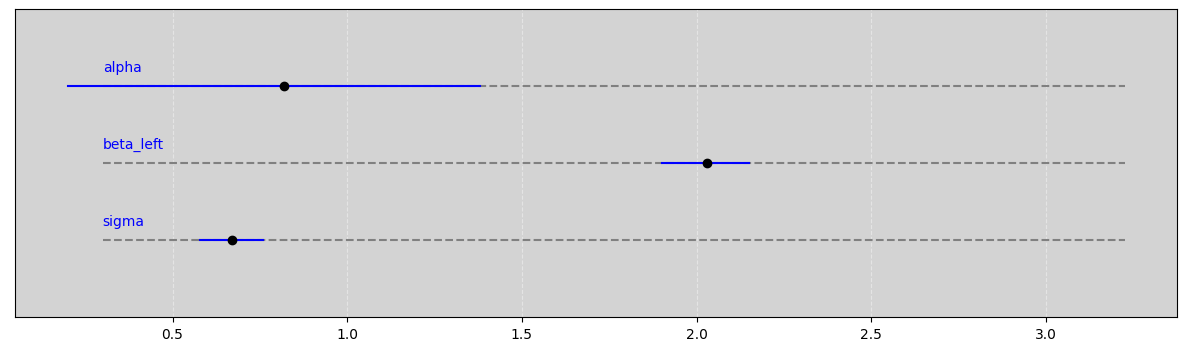

In [16]:
Vide.plot_forest(samples)

### R Code 6.8

In [24]:
df = pd.read_csv('data/milk.csv', sep=';')

df_std = df[['kcal.per.g', 'perc.fat', 'perc.lactose']].copy()

df_std['kcal.per.g'] = (df_std['kcal.per.g'] - df_std['kcal.per.g'].mean()) / df_std['kcal.per.g'].std()
df_std['perc.fat'] = (df_std['perc.fat'] - df_std['perc.fat'].mean()) / df_std['perc.fat'].std()
df_std['perc.lactose'] = (df_std['perc.lactose'] - df_std['perc.lactose'].mean()) / df_std['perc.lactose'].std()

df_std.head()

,kcal.per.g,perc.fat,perc.lactose
0,-0.940041,-1.217243,1.307262
1,-0.816126,-1.030355,1.011285
2,-1.125913,-1.391531,1.382679
3,-1.001998,-1.335535,1.586874
4,-0.258511,-0.469693,0.257115


In [25]:
# Não tem nenhum 'missing values'

df_std.isna().sum()

kcal.per.g      0
perc.fat        0
perc.lactose    0
dtype: int64

### R Code 6.9

In [26]:
# kcal.per.g  regredido em perc.fat

model_kf = """
    data {
        int N;
        vector[N] outcome;
        vector[N] predictor;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    model {
        alpha ~ normal(0, 0.2);
        beta ~ normal(0, 0.5);
        sigma ~ exponential(1);
        
        outcome ~ normal(alpha + beta * predictor, sigma);
    }
"""

data_kf = {
    'N': len(df_std['kcal.per.g']),
    'outcome': list(df_std['kcal.per.g'].values),
    'predictor': list(df_std['perc.fat'].values),
}

posteriori_kf = stan.build(model_kf, data=data_kf)
samples_kf = posteriori_kf.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_p4p2qcr5/model_jcowtlon.stan', line 19, column 8 to column 58)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition woul

In [27]:
# kcal.per.g  regredido em  perc.lactose

model_kl = """
    data {
        int N;
        vector[N] outcome;
        vector[N] predictor;
    }
    
    parameters {
        real alpha;
        real beta;
        real<lower=0> sigma;
    }
    
    model {
        alpha ~ normal(0, 0.2);
        beta ~ normal(0, 0.5);
        sigma ~ exponential(1);
        
        outcome ~ normal(alpha + beta * predictor, sigma);
    }
"""

data_kl = {
    'N': len(df_std['kcal.per.g']),
    'outcome': df_std['kcal.per.g'].values,
    'predictor': df_std['perc.lactose'].values,
}

posteriori_kl = stan.build(model_kl, data=data_kl)
samples_kl = posteriori_kf.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_p4p2qcr5/model_jcowtlon.stan', line 19, column 8 to column 58)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition woul

In [28]:
Vide.summary(samples_kf)

,mean,std,7.0%,93.0%
alpha,0.00,0.08,-0.15,0.14
beta,0.86,0.09,0.70,1.02
sigma,0.49,0.07,0.37,0.60


In [29]:
Vide.summary(samples_kl)

,mean,std,7.0%,93.0%
alpha,0.00,0.08,-0.15,0.14
beta,0.86,0.09,0.70,1.02
sigma,0.49,0.07,0.37,0.60
